In [126]:
import pandas as pd

In [127]:
dataFrame = pd.read_csv(
    filepath_or_buffer = "./startup_funding.csv"
)

dataFrame.info()
dataFrame.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


(3044, 10)

In [128]:
dataFrame

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [129]:
dataFrame.drop(columns = ["Remarks"], inplace = True)

In [130]:
dataFrame.set_index("Sr No", inplace = True)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [131]:
dataFrame.rename(
    columns = {
        "Sr No" : "index",
        "Date dd/mm/yyyy" : "date",
        "Startup Name" : "startup",
        "Industry Vertical": "vertical",
        "SubVertical" : "subvertical",
        "City  Location" : "city",
        "Investors Name" : "investor",
        "InvestmentnType" : "round",
        "Amount in USD" : "ammount"
    },
    inplace = True
)

In [132]:
dataFrame.head()

,date,startup,vertical,subvertical,city,investor,round,ammount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [133]:
dataFrame["ammount"].fillna(value = '0', inplace = True)
# 0.0 means not disclosed

C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\75920121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataFrame["ammount"].fillna(value = '0', inplace = True)


In [134]:
dataFrame["ammount"] = dataFrame["ammount"].str.replace(",", "")

In [135]:
dataFrame["ammount"] = dataFrame["ammount"].str.replace("undisclosed", "0")

In [136]:
dataFrame["ammount"] = dataFrame["ammount"].str.replace("Undisclosed", "0")

In [137]:
dataFrame["ammount"] = dataFrame["ammount"].str.replace("unknown", "0")

In [138]:
dataFrame["ammount"] = dataFrame["ammount"].str.replace("Unknown", "0")

In [139]:
dataFrame = dataFrame[dataFrame["ammount"].str.isdigit()]

In [140]:
dataFrame['ammount'].astype("float", copy = False)

Sr No
1       200000000.0
2         8048394.0
3        18358860.0
4         3000000.0
5         1800000.0
           ...     
3040      4500000.0
3041       825000.0
3042      1500000.0
3043            0.0
3044       140000.0
Name: ammount, Length: 3029, dtype: float64

In [141]:
dataFrame

,date,startup,vertical,subvertical,city,investor,round,ammount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000


In [142]:
def to_inr(dollar):
    inr = dollar * 93.5
    return inr / 10000000

to_inr(18358860.0)

171.655341

In [143]:
dataFrame["ammount"] = dataFrame["ammount"].astype(dtype = "float")

C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\705747426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["ammount"] = dataFrame["ammount"].astype(dtype = "float")


In [144]:
dataFrame

,date,startup,vertical,subvertical,city,investor,round,ammount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0


In [145]:
dataFrame["inr"] = dataFrame['ammount'].apply(to_inr)

C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\1427440854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["inr"] = dataFrame['ammount'].apply(to_inr)


In [146]:
dataFrame["ammount"] = dataFrame['inr']


C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\2418208774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["ammount"] = dataFrame['inr']


In [147]:
dataFrame.drop(
    columns = ["inr"],
    inplace = True
)

C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\610587578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame.drop(


In [148]:
dataFrame

,date,startup,vertical,subvertical,city,investor,round,ammount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1870.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,75.252484
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,171.655341
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.050000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.830000
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,42.075000
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,7.713750
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,14.025000


In [149]:
dataFrame["date"] = pd.to_datetime(dataFrame["date"], errors='coerce')

C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\1219880370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["date"] = pd.to_datetime(dataFrame["date"], errors='coerce')


In [150]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1283 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investor     3005 non-null   object        
 6   round        3027 non-null   object        
 7   ammount      3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [151]:
dataFrame.dropna(
    subset = [
        "date",
        "startup",
        "vertical",
        "city",
        "investor",
        "round",
        "ammount"
    ],
    inplace = True
)

C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\4167963880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame.dropna(


In [152]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1202 entries, 1 to 2829
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1202 non-null   datetime64[ns]
 1   startup      1202 non-null   object        
 2   vertical     1202 non-null   object        
 3   subvertical  890 non-null    object        
 4   city         1202 non-null   object        
 5   investor     1202 non-null   object        
 6   round        1202 non-null   object        
 7   ammount      1202 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 84.5+ KB


In [153]:
dataFrame.to_csv("startup_cleaned.csv", index = False)

In [154]:
dataFrame["year"] = dataFrame["date"].dt.year

C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\2978651260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame["year"] = dataFrame["date"].dt.year


In [155]:
dataFrame

,date,startup,vertical,subvertical,city,investor,round,ammount,year
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1870.000000,2020
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,171.655341,2020
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.050000,2020
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.830000,2020
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1402.500000,2020
...,...,...,...,...,...,...,...,...,...
2825,2015-09-04,Urban Ladder,Online Furnishing\\neCommerce,NaN,Bangalore,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,467.500000,2015
2826,2015-09-04,Purple Squirrel,Ed-Tech,NaN,Mumbai,"Matrix Partners India, India Quotient",Private Equity,0.000000,2015
2827,2015-10-04,Whatfix,Interactive\\xc2\\xa0 How-To Guides,NaN,Bangalore,"Helion Venture Partner, Powerhouse Ventures, G...",Seed Funding,8.415000,2015


<Axes: xlabel='year'>

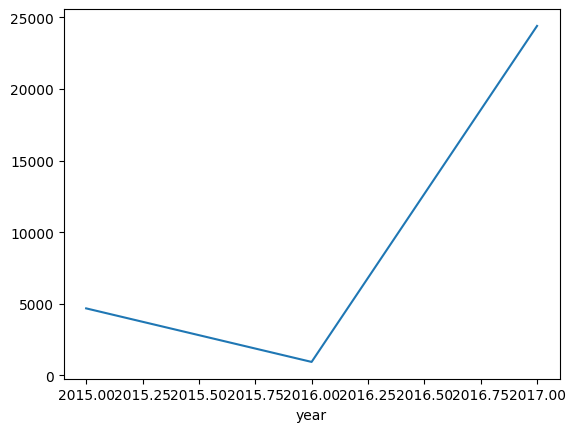

In [156]:
dataFrame[dataFrame['investor'].str.contains("Softbank")].groupby("year")['ammount'].sum().plot()

In [157]:
dataFrame.to_csv("startup_cleaned.csv", index = False)

In [158]:
series = dataFrame[dataFrame['investor'].str.contains("Softbank")]["startup"]

print(series)

similarInvestors = dataFrame[dataFrame["startup"].isin(series.values)].groupby("startup")

resultList = []


for key, data in similarInvestors:
    temp = similarInvestors.get_group(key).sort_values(by = ["ammount"], ascending = False)["investor"].head(2)
    # print(temp)

    for x in temp.values:
        resultList.append(x)

resultList


Sr No
524     Ola Cabs
652     Flipkart
1761         Oyo
2471    Snapdeal
Name: startup, dtype: object


['Softbank',
 'Morgan Stanley',
 'Tencent, Softbank Group',
 'Tekne Capital Management',
 'Softbank, Sequoia Capital, Lightspeed Venture Partners, Greenoaks Capital, DSG Consumer Partners and Venture Nursery',
 'Alibaba, Foxconn, Softbank']

In [159]:
dataFrame.groupby("startup")['ammount'].sum().sort_values(ascending = False).index[0]

'Flipkart'

In [160]:
maxInvesment = dataFrame['ammount'].max()

dataFrame[dataFrame["ammount"] == maxInvesment]["investor"]

Sr No
652    Softbank
Name: investor, dtype: object

In [161]:
dataFrame['month'] = dataFrame['date'].dt.month

C:\Users\anamika\AppData\Local\Temp\ipykernel_19408\1264235969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['month'] = dataFrame['date'].dt.month


In [162]:
dataFrame

,date,startup,vertical,subvertical,city,investor,round,ammount,year,month
Sr No,,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1870.000000,2020,9
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,171.655341,2020,9
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,28.050000,2020,2
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,16.830000,2020,2
7,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,1402.500000,2020,10
...,...,...,...,...,...,...,...,...,...,...
2825,2015-09-04,Urban Ladder,Online Furnishing\\neCommerce,NaN,Bangalore,"Sequoia Capital, TR Capital, Steadview Capital...",Private Equity,467.500000,2015,9
2826,2015-09-04,Purple Squirrel,Ed-Tech,NaN,Mumbai,"Matrix Partners India, India Quotient",Private Equity,0.000000,2015,9
2827,2015-10-04,Whatfix,Interactive\\xc2\\xa0 How-To Guides,NaN,Bangalore,"Helion Venture Partner, Powerhouse Ventures, G...",Seed Funding,8.415000,2015,10


In [163]:
temp_df = dataFrame.groupby(['year', "month"])['ammount'].sum().reset_index()

In [164]:
temp_df['x_axis'] = dataFrame['month'].astype("str") + "-" + dataFrame['year'].astype('str')

In [ ]:
temp_df

,year,month,ammount,x_axis
0,2015,1,5977.922500,NaN
1,2015,2,1776.135350,9-2020
2,2015,3,2165.413250,NaN
3,2015,4,2194.865750,9-2020
4,2015,5,926.912250,2-2020
...,...,...,...,...
57,2019,11,1307.130000,NaN
58,2019,12,1397.825000,NaN
59,2020,2,44.880000,NaN
60,2020,9,2041.655341,NaN
